<a href="https://colab.research.google.com/github/eduardosalvalen/ML-Python/blob/main/Image_clasification_with_Transfer_Learning_and_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image clasification with Transfer Learning and TF

In [1]:
''' Transfer Learning project, based on satellite pictures  of the earth surface, in 10 different categories
*AnnualCrop: Cultivo anual (estacional)
*Foresst: Bosque
* HerbaceousVegetation: Vegetacion de Hierba
*Highway: Autopista
*Industrial: uso industrial
*Posture: Pastoreo
* PermanebtCrop: cultivo permanente
*Residential
*River: Rio
*SeaLake: Cuerpo de agua (Lago o mar)'''
## 27 000 pictures in RGB Format using TensorFlow

' Transfer Learning project, based on satellite pictures  of the earth surface, in 10 different categories\n*AnnualCrop: Cultivo anual (estacional)\n*Foresst: Bosque\n* HerbaceousVegetation: Vegetacion de Hierba\n*Highway: Autopista\n*Industrial: uso industrial\n*Posture: Pastoreo\n* PermanebtCrop: cultivo permanente\n*Residential\n*River: Rio\n*SeaLake: Cuerpo de agua (Lago o mar)'

In [2]:
#import Libraries
import tensorflow as tf
import tensorflow_datasets as tfds

# load the dataset
ds, ds_info = tfds.load(
    "eurosat", #Dataset Name
    with_info=True, #Tag names on
    shuffle_files=True,
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],#Split data
    as_supervised=True, #Include tag names
    read_config = tfds.ReadConfig(shuffle_seed=23), #Seed for the random engine
)
#Extract the training, validation, and test sets
train, val, test = ds[0],ds[1],ds[2]

#Printinfo
print(f'size of the training set: {len(train)}')
print(f'size of the validation set: {len(val)}')
print(f'size of the test set: {len(test)}')




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/incomplete.QJ9JEX_2.0.0/eurosat-train.tfrecord*...:   0%|     …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
size of the training set: 21600
size of the validation set: 2700
size of the test set: 2700


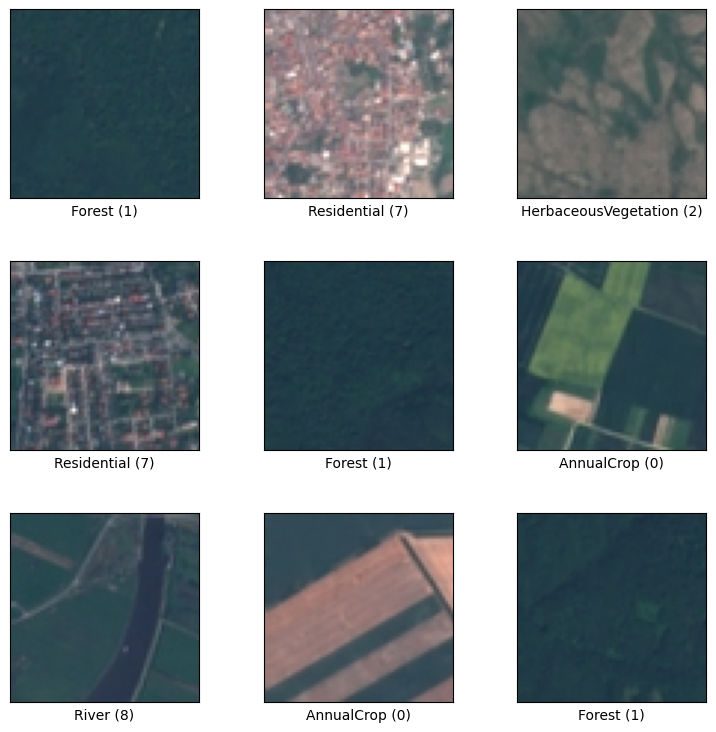

In [3]:
tfds.show_examples(train, ds_info);


In [4]:
for img, lbl in train.take(1):
  print(f'Minimo y maximo: {img.numpy().min()}, {img.numpy().max()}')
  print(f'Tipo de dato: {img.dtype}')
  print(f'Tamano: {img.get_shape()}')


Minimo y maximo: 26, 98
Tipo de dato: <dtype: 'uint8'>
Tamano: (64, 64, 3)


In [5]:
# Using the Xception model available in the repository of Keras
#Convolutional red of more than 23 millions
# Trained with the ImageNet set (1.2 millions of images)
#Minimum input size 71x71, have to pre-process our data (64x64)
#Kind of input data: float32 and values btw -1 and 1 (change  from uintt8 to float 32 and pixels to 1,-1)

#Pre-processing

In [6]:
def preprocesar(img,lbl):
  #Redimensionar
  img=tf.image.resize(img,(71,71))

  #Convert the pixels to 1,-1 and float 32
  img =tf.image.convert_image_dtype((img/127.5)-1,dtype=tf.float32)
  return img, lbl


In [7]:
for img, lbl in train.map(preprocesar).take(1):
  print(f'Minimo y maximo: {img.numpy().min()}, {img.numpy().max()}')
  print(f'Tipo de dato: {img.dtype}')
  print(f'Tamano: {img.get_shape()}')


Minimo y maximo: -0.7836509346961975, -0.2982698678970337
Tipo de dato: <dtype: 'float32'>
Tamano: (71, 71, 3)


#Implementation of the model

In [8]:
import tensorflow.keras as keras
tf.random.set_seed(123)

#trainded model
xception = keras.applications.Xception(
    weights = "imagenet",
    input_shape = (71,71,3),
    include_top = False #No including output layer
)
#characteristics of the model
xception.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 71, 71, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 35, 35, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 35, 35, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 35, 35, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 33, 33, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 33, 33, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 33, 33, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 33, 33, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 33, 33, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 33, 33, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 17, 17, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 17, 17, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [9]:
xception.trainable= False
xception.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 71, 71, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 35, 35, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 35, 35, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 35, 35, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 33, 33, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 33, 33, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 33, 33, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 33, 33, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 33, 33, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 33, 33, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 33, 33, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 17, 17, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 17, 17, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Model: "modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Entrada (InputLayer)                 │ (None, 71, 71, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 3, 3, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Aplanar (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Drop_1 (Dropout)                     │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Salida (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,222,194 (88.59 MB)

 Trainable params: 2,360,714 (9.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

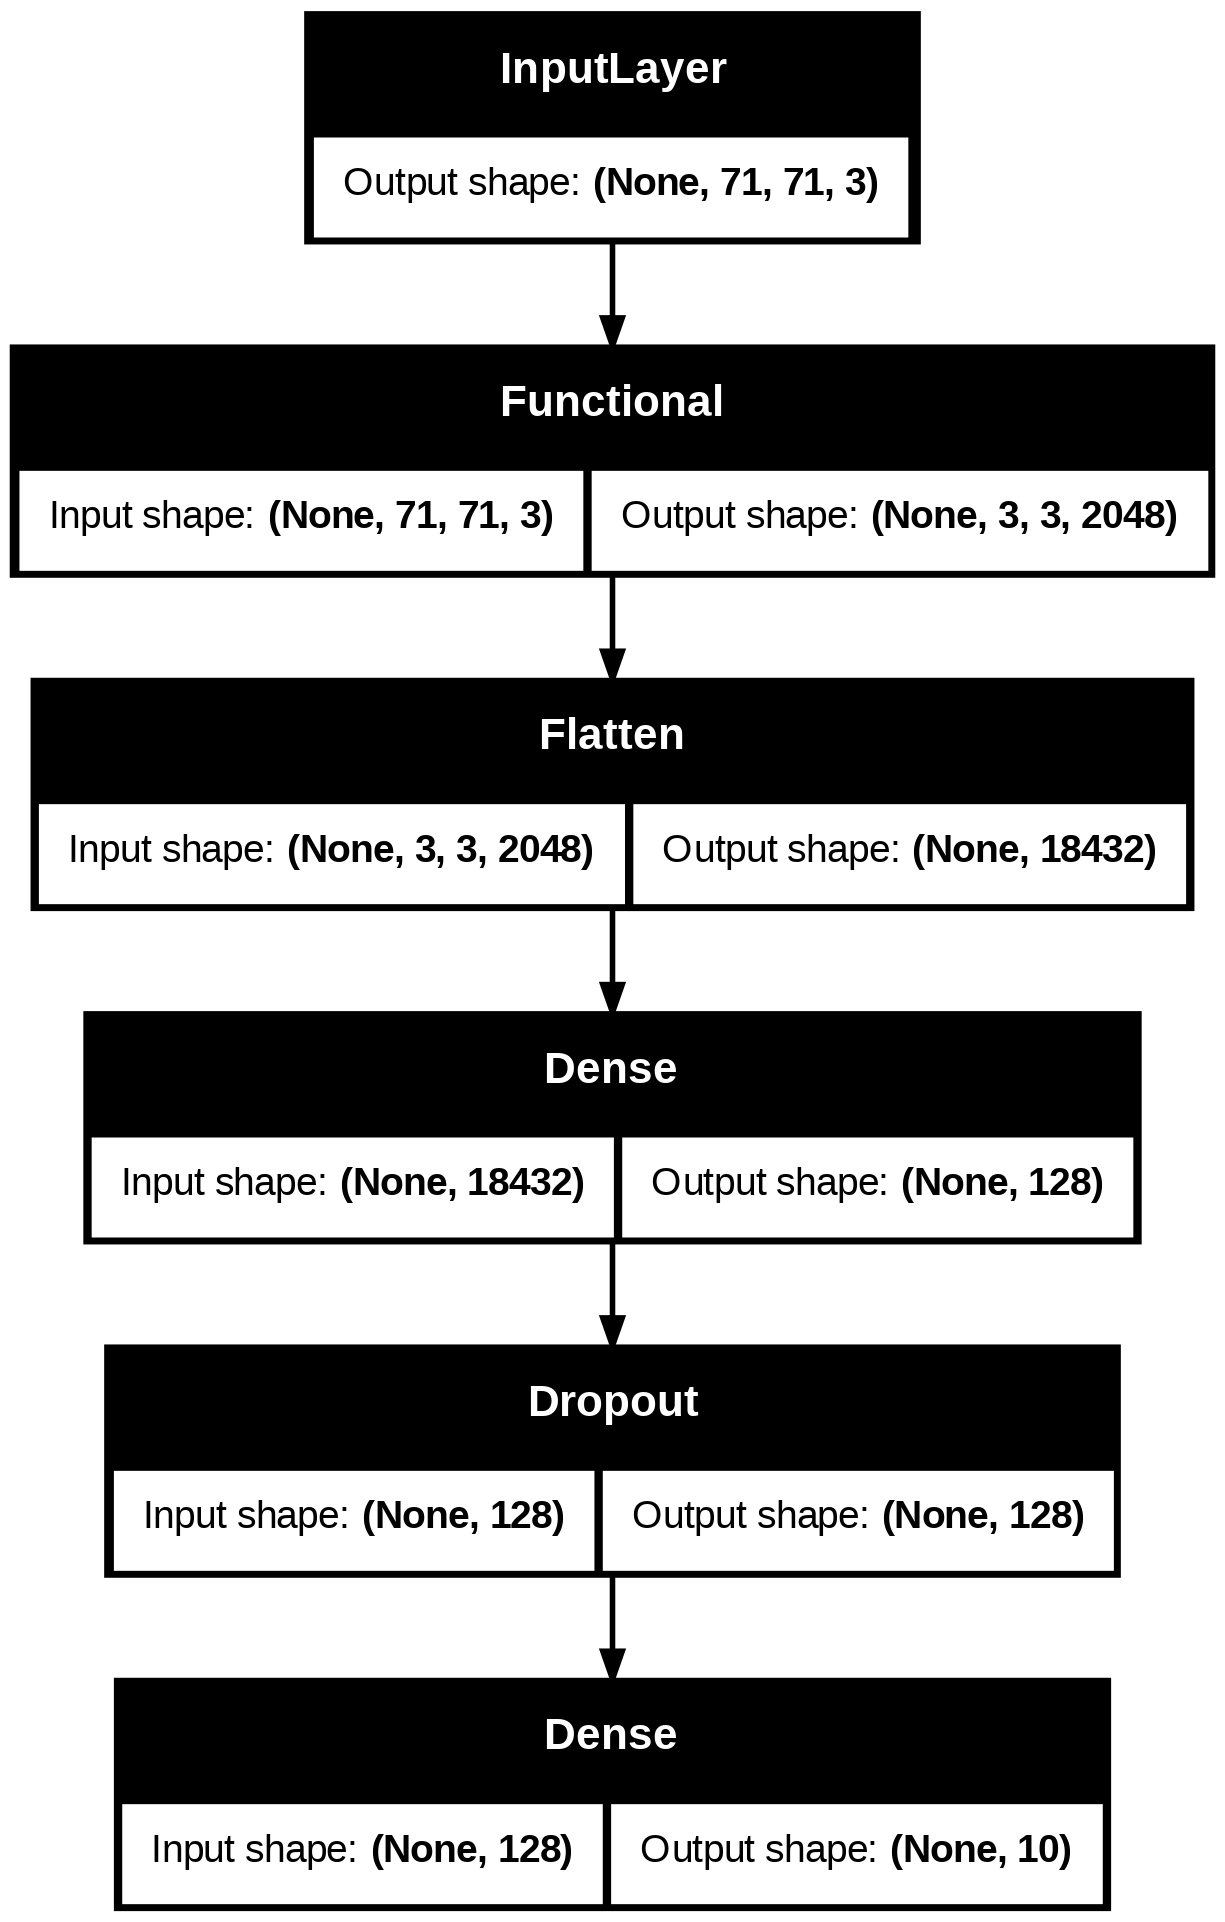

In [11]:
# We are going to use the freeze model as base for the clasificator
# Model = Input layer -> Xception(freeze) -> Output layer
NUM_CLASES = ds_info.features['label'].num_classes

#Input layer
entrada = keras.Input(shape=(71,71,3), name='Entrada')

#Link with the trainded model
# Entrada + xception
x = xception(entrada)

#Buil a output and link to the entry
#1. flatten layer to flatten the volume gnerate by xception
#Entrada + Xeption +flatten
x= keras.layers.Flatten(name='Aplanar')(x)

#2.- "Dense layer" with 128 neurons
#Entrada + Xeption + flatten + Dense 128
x = keras.layers.Dense(128,activation='relu', name='Dense_1')(x)

#3.- "Dopout" Layer to reduce overfitting
#Entrada + Xeption + flatten + Dense 128 +Dropuot
x = keras.layers.Dropout(0.5, name='Drop_1')(x)

#4.- "Dense layer with 10 output neurons
#Entrada + Xeption + flatten + Dense 128 + Dropout + Dense 10
salida = keras.layers.Dense(NUM_CLASES, activation='softmax', name='Salida')(x)

# Link the output with the input
modelo = keras.Model(entrada, salida, name='modelo')

# model summary
modelo.summary()

# Draw the model blocks
keras.utils.plot_model(modelo, show_shapes=True)

# Train

In [13]:
BATCH_SIZE=32
# make training batches, validation and test
train_batch = train.map(preprocesar).batch(BATCH_SIZE)
val_batch = val.map(preprocesar).batch(BATCH_SIZE)
test_batch = test.map(preprocesar).batch(BATCH_SIZE)

In [ ]:
# compile the model
modelo.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

#Train with 10 iterations
epochs = 10
modelo.fit(train_batch, epochs=epochs, validation_data=val_batch)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 646s 948ms/step - loss: 1.4217 - sparse_categorical_accuracy: 0.6150 - val_loss: 0.5791 - val_sparse_categorical_accuracy: 0.8170
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 675s 939ms/step - loss: 0.7725 - sparse_categorical_accuracy: 0.7611 - val_loss: 0.5841 - val_sparse_categorical_accuracy: 0.8159
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 630s 934ms/step - loss: 0.6795 - sparse_categorical_accuracy: 0.7881 - val_loss: 0.4800 - val_sparse_categorical_accuracy: 0.8437
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 682s 934ms/step - loss: 0.6117 - sparse_categorical_accuracy: 0.8065 - val_loss: 0.4741 - val_sparse_categorical_accuracy: 0.8511
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 629s 932ms/step - loss: 0.5554 - sparse_categorical_accuracy: 0.8268 - val_loss: 0.4796 - val_sparse_categorical_accuracy: 0.8456
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 683s 934ms/step - loss: 0.5252 - sparse_categorical_accuracy: 0.8285 - val_loss: 0.4466 - val_sparse_categoric